In [1]:
library(readxl)

In [2]:
data <- read_excel(paste("./KOBIS_기간별박스오피스_", 2016, "_", 2016 + 1,".xlsx", sep = ""))

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in A1588 / R1588C1: got '<ed>빀怨<84>'"New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5


In [110]:
library(readxl)
# 전부 합한 데이터 프레임 생성
total_data <- c()

# 년도 설정(2004~2017)
yearData = c(2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018)

for (yearVal in yearData) {
    # 데이터 불러오기
    data <- read_excel(paste("./KOBIS_기간별박스오피스_", yearVal, "_", yearVal + 1,".xlsx", sep = ""))

    # 컬럼 이름 매출액 점유율 엔터로 인해 새로운 로우 생긴 것 처리
    colnames(data)[4:5] <- c("매출액","매출액점유율")
    data <- data[-1,]

    # 국적, 순위 제외
    data <- subset(data, select = - c(국적, 순위))

    # 개봉년도가 파일의 조회 기간 +- 1년도 이상 차이나는 년도 제외
    data <- subset(data, (format(data$개봉일,"%Y") >= (yearVal - 1)) & (format(data$개봉일,"%Y") <= (yearVal + 2)))

    # 배우 1명으로 변경(2글자 이름 처리, 4글자는 없어서 처리 안함 --> 혹시 모르니까 해야 할지도?)
#     data$배우 <- ifelse(substr(data$배우,3,3) == ",", substr(data$배우,1,2), substr(data$배우,1,3))

    # 매출액 점유율 타입 변경
    data$매출액점유율 <- round(as.numeric(data$매출액점유율)*100,2)
    
    # 최종 데이터 프레임에 추가
    total_data <- rbind(total_data, data)

    # csv 파일로 저장
#     write.csv(data, file = paste("./KOBIS_기간별박스오피스_", yearVal, "_", yearVal + 1,".csv", sep = ""), row.names = FALSE)
}

New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in A1549 / R1549C1: got '<ed>빀怨<84>'"New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in A1014 / R1014C1: got '<ed>빀怨<84>'"New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in A1588 / R1588C1: got '<ed>빀怨<84>'"New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in A2197 / R2197C1: got '<ed>빀怨<84>'"New names:
* 매출액 -> 매출액...4
* 매출액 -> 매출액...5


In [112]:
nrow(total_data)

[1] 3053

In [5]:
for (i in 1:ncol(total_data)) {
    print(colnames(total_data)[i])
    print(sum(is.na(total_data[,i])))
}


[1] "영화명"
[1] 0
[1] "개봉일"
[1] 0
[1] "매출액"
[1] 0
[1] "매출액점유율"
[1] 0
[1] "누적매출액"
[1] 0
[1] "관객수"
[1] 0
[1] "누적관객수"
[1] 0
[1] "스크린수"
[1] 0
[1] "상영횟수"
[1] 0
[1] "대표국적"
[1] 0
[1] "제작사"
[1] 64
[1] "배급사"
[1] 63
[1] "등급"
[1] 52
[1] "장르"
[1] 45
[1] "감독"
[1] 55
[1] "배우"
[1] 631


In [6]:
length(unique(total_data$영화명))

[1] 2260

In [7]:
nrow(total_data)

[1] 2479

In [8]:
# NA값 제거
total_data <- subset(total_data, !is.na(total_data$제작사) & !is.na(total_data$배급사) & !is.na(total_data$등급) & !is.na(total_data$장르) & !is.na(total_data$감독) & !is.na(total_data$배우))
nrow(total_data)

[1] 1805

In [9]:
head(total_data)

영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,제작사,배급사,등급,장르,감독,배우
웰컴 투 동막골,2005-08-04,40328508500,5.9,40328508500,6436508,6436508,356,72108,한국,"필름있수다,(주)쇼박스",(주)쇼박스,12세관람가,"전쟁,드라마",박광현,신하균
가문의 위기(가문의 영광2),2005-09-07,28622355500,4.2,28622355500,4529876,4529876,351,61009,한국,(주)태원엔터테인먼트,(주)쇼박스,15세관람가,코미디,정용기,신현준
말아톤,2005-01-27,26284943000,3.8,26284943000,4196840,4196840,238,59493,한국,시네라인투(주),(주)쇼박스,전체관람가,드라마,정윤철,조승우
공공의 적 2,2005-01-27,20091127000,2.9,20091127000,3134421,3134421,299,40642,한국,(주)시네마서비스,(주)시네마서비스,15세관람가,드라마,강우석,설경구
친절한 금자씨,2005-07-29,20483051393,3.0,20483051393,3119682,3119682,386,41438,한국,(주)모호필름,CJ ENM,18세관람가,스릴러,박찬욱,이영애
태풍,2005-12-14,19372557600,2.8,19372557600,3035086,3035086,481,36678,한국,CJ ENM,CJ ENM,15세관람가,"드라마,액션",곽경택,김혜정


In [10]:
length(unique(total_data$영화명))

[1] 1596

In [11]:
test <- read.csv("./movie2004_2019_ver2.csv", fileEncoding = "utf-8")

In [12]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
arrange(test, desc(test$누적매출액))

영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
극한직업,16265618,0.075,139651845516,2003,139651845516,16265618,292584,2019-01-23,(주)어바웃잇,(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,류승룡
명량,17615658,8.300,135757221810,1587,135756636810,17615545,188702,2014-07-30,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,사극,김한민,최민식
신과함께-죄와 벌,14411775,3.800,115707627637,1912,115707627637,14411775,213315,2017-12-20,리얼라이즈픽쳐스(주),롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,판타지,김용화,하정우
국제시장,14263578,6.800,110942451730,1044,110937978730,14262661,212676,2014-12-17,(주)제이케이필름,(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,황정민
베테랑,13414484,6.400,105170856250,1115,105170856250,13414484,199307,2015-08-05,(주)외유내강,(주)씨제이이엔엠,15세이상관람가,액션,류승완,황정민
신과함께-인과 연,12276350,0.055,102677675409,2235,102677675409,12276350,180042,2018-08-01,리얼라이즈픽쳐스(주),롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,판타지,김용화,하정우
암살,12706819,6.000,98468435781,1519,98468435781,12706819,175213,2015-07-22,(주)케이퍼필름,(주)쇼박스,15세이상관람가,액션,최동훈,전지현
택시운전사,12189654,5.300,95871287649,1906,95871287649,12189654,184200,2017-08-02,더램프(주),(주)쇼박스,15세이상관람가,드라마,장훈,이수민
도둑들,12984692,5.400,93672361700,1091,93670679700,12984181,155469,2012-07-25,(주)케이퍼필름,(주)쇼박스,15세이상관람가,액션,최동훈,김윤석
부산행,11567662,5.200,93187397548,1788,93187397548,11567662,151530,2016-07-20,(주)영화사레드피터,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,액션,연상호,공유


In [14]:
table(test$등급)


    12세관람가 12세이상관람가     15세관람가 15세이상관람가     18세관람가 
            50            213             99            412             44 
    전체관람가 청소년관람불가 
           148           1737 

In [15]:
table(test$장르)


            SF           가족           공연     공포(호러)           기타 
            10             14             17             67             26 
    다큐멘터리         드라마    멜로/로맨스         뮤지컬       미스터리 
            22            442           1426              6             41 
          범죄           사극 서부극(웨스턴)   성인물(에로)         스릴러 
            69             39              1             33             92 
    애니메이션           액션       어드벤처           전쟁         코미디 
            58             99              2              9            223 
        판타지 
             7 

In [16]:
subset(test, 등급 == "청소년관람불가" & 장르 == "멜로/로맨스")

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
325,"동거, 동락",5226,0.0,32156500,8,32156500,5226,480,2008-03-27,(주)알지엔터웍스,(주)쇼박스,청소년관람불가,멜로/로맨스,김태희,김청
358,아내가 결혼했다,1799501,1.4,12062558000,417,12062558000,1799501,57498,2008-10-23,(주)주피터필름,CJ ENM,청소년관람불가,멜로/로맨스,정윤수,손예진
411,킬 미,50730,0.0,386192500,168,386192500,50730,6377,2009-11-05,(주)싸이더스,(주)싸이더스,청소년관람불가,멜로/로맨스,양종현,신현준
416,백야행,949896,0.8,7121437000,387,7121437000,949896,30390,2009-11-19,(주)시네마서비스,(주)시네마서비스,청소년관람불가,멜로/로맨스,박신우,한석규
441,비밀애,164252,0.1,1206962000,268,1206962000,164252,15211,2010-03-25,(주)한컴,(주)시너지하우스 (시너지),청소년관람불가,멜로/로맨스,류훈,유지태
480,나탈리,94875,0.1,1114062000,196,1114062000,94875,10025,2010-10-28,(주)상상엔터테인먼트,롯데쇼핑㈜롯데엔터테인먼트,청소년관람불가,멜로/로맨스,주경중,이성재
486,두 여자,129576,0.1,967522000,216,967522000,129576,10114,2010-11-18,(주)케이앤엔터테인먼트,CJ ENM,청소년관람불가,멜로/로맨스,정윤수,문소연
594,은교,1346362,0.6,9918298444,521,9918298444,1346362,41684,2012-04-25,정지우 필름,롯데쇼핑㈜롯데엔터테인먼트,청소년관람불가,멜로/로맨스,정지우,박해일
638,맛있는불륜-택시,103,0.0,515000,1,515000,103,1,2012-10-25,(주)케이알씨지,(주)케이알씨지,청소년관람불가,멜로/로맨스,이숭환,양민영
640,전망 좋은 집,1461,0.0,10864000,23,10864000,1461,269,2012-10-25,㈜리필름,(주)마인스 엔터테인먼트,청소년관람불가,멜로/로맨스,이수성,곽현화


In [17]:
nrow(arrange(subset(test, 제작사 == "(주)케이알씨지" | 제작사 == "영화사 산들바람"), desc(관객수)))

[1] 218

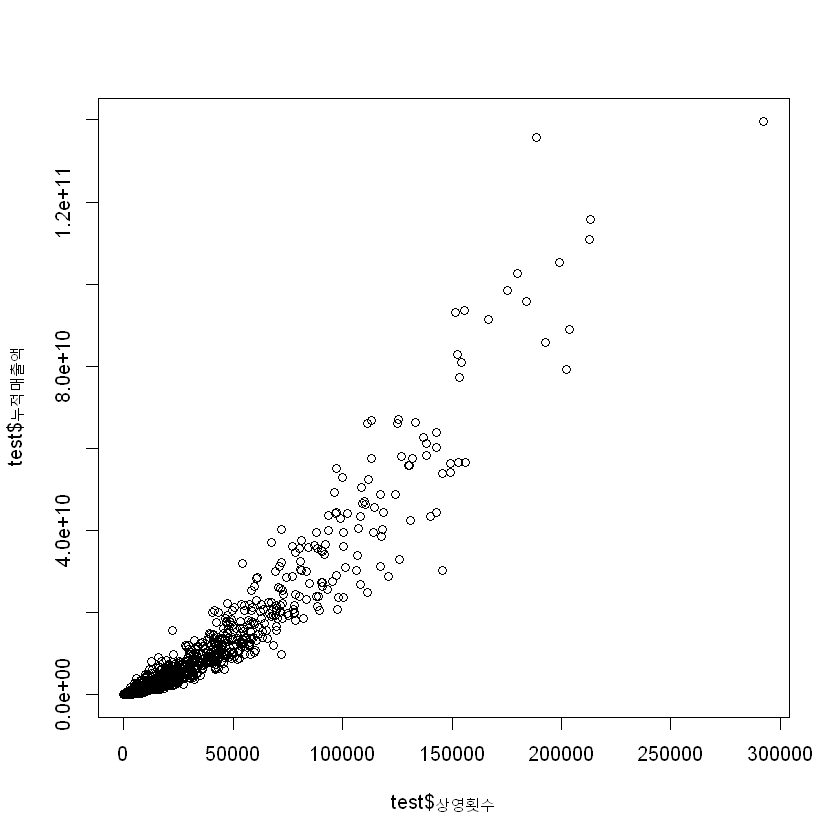

In [18]:
plot(test$상영횟수,test$누적매출액)

In [19]:
cor(test$상영횟수, test$누적매출액)

[1] 0.9450119

In [20]:
((subset(test, test$누적관객수 > 5000000)))

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
96,웰컴 투 동막골,6436508,5.9,40328508500,356,40328508500,6436508,72108,2005-08-04,필름있수다,(주)쇼박스,12세관람가,전쟁,박광현,신하균
133,왕의 남자,10513976,6.0,66018145400,313,66018064400,10513960,111179,2005-12-29,(주)씨네월드,(주)시네마서비스,15세이상관람가,드라마,이준익,감우성
138,투사부일체,5074314,3.1,31959686000,407,31959686000,5074314,54339,2006-01-19,(주)시네마제니스,CJ ENM,15세관람가,코미디,김동원,정준호
181,괴물,10917400,6.5,66717700300,647,66717477300,10917374,113097,2006-07-27,영화사청어람(주),(주)쇼박스,12세관람가,SF,봉준호,송강호
206,타짜,5685521,3.5,36181314700,492,36181314700,5685521,76884,2006-09-28,(주)싸이더스,CJ ENM,18세관람가,드라마,최동훈,조승우
221,미녀는 괴로워,6081480,3.5,36292848900,418,36292848900,6081480,87141,2006-12-14,리얼라이즈픽쳐스(주),(주)쇼박스,12세이상관람가,멜로/로맨스,김용화,김아중
261,화려한 휴가,6855314,4.3,44098519600,551,44098519600,6855314,96528,2007-07-25,기획시대(주),CJ ENM,12세이상관람가,드라마,김지훈,김상경
264,디워,7855474,4.8,49340084700,622,49340084700,7855474,96439,2007-08-01,㈜영구아트,(주)쇼박스,12세이상관람가,액션,심형래,브룩스
319,추격자,5046096,3.9,33986959000,433,33986959000,5046096,106805,2008-02-14,(주)영화사비단길,(주)쇼박스,청소년관람불가,범죄,나홍진,김윤석
340,"좋은 놈, 나쁜 놈, 이상한 놈",6686075,5.0,43755980300,824,43754448300,6685866,93579,2008-07-17,(주)다크서클픽쳐스,CJ ENM,15세이상관람가,서부극(웨스턴),김지운,송강호


In [21]:
subset(test, 배우 == "하정우")

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
395,국가대표,8035181,6.500,57570773000,570,57570773000,8035181,131671,2009-07-29,케이엠컬쳐㈜,(주)쇼박스,12세이상관람가,드라마,김용화,하정우
402,국가대표 완결판-못 다한 이야기,357436,0.300,2647781500,82,2647781500,357436,8509,2009-09-10,케이엠컬쳐㈜,(주)쇼박스,12세이상관람가,드라마,김용화,하정우
583,러브픽션,1726227,0.800,13200551500,617,13200551500,1726227,44133,2012-02-29,(주)삼거리픽쳐스,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,멜로/로맨스,전계수,하정우
624,577 프로젝트,96080,0.000,695770500,191,695770500,96080,5041,2012-08-30,(주)다세포클럽,필라멘트픽쳐스,15세이상관람가,코미디,이근우,하정우
672,베를린,7166688,3.000,52358372637,894,52357900637,7166628,111753,2013-01-30,(주)외유내강,(주)씨제이이엔엠,15세이상관람가,액션,류승완,하정우
705,더 테러 라이브,5584295,2.300,39870954381,809,39870954381,5584295,93489,2013-07-31,(주)씨네이천,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,범죄,김병우,하정우
808,군도: 민란의 시대,4775441,2.300,36989711499,1394,36989711499,4775441,67252,2014-07-23,(주)영화사 월광,(주)쇼박스,15세이상관람가,사극,윤종빈,하정우
870,허삼관,956103,0.500,7410215569,621,7410215569,956103,27661,2015-01-14,(주)두타연,(주)넥스트엔터테인먼트월드(NEW),12세이상관람가,드라마,하정우,하정우
1152,터널,7120780,3.200,57530028417,1105,57530028417,7120780,113214,2016-08-10,(주)어나더썬데이,(주)쇼박스,12세이상관람가,드라마,김성훈,하정우
1614,신과함께-죄와 벌,14411775,3.800,115707627637,1912,115707627637,14411775,213315,2017-12-20,리얼라이즈픽쳐스(주),롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,판타지,김용화,하정우


In [22]:
subset(test, 배우 == "이수민")
subset(test, 영화명 == "택시운전사")

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
1157,아빠친구,165,0.0,894000,20,894000,165,21,2016-08-18,스마일컨텐츠,스마일컨텐츠,청소년관람불가,멜로/로맨스,이슬,이수민
1318,특이점이 온 영화,165,0.0,839000,20,839000,165,20,2017-03-07,밀크픽처스,밀크픽처스,청소년관람불가,코미디,공자관,이수민
1463,택시운전사,12189654,5.3,95871287649,1906,95871287649,12189654,184200,2017-08-02,더램프(주),(주)쇼박스,15세이상관람가,드라마,장훈,이수민
1600,새엄마 2,129,0.0,764000,20,764000,129,20,2017-12-07,(주)영화사 사계절,(주)영화사 사계절,청소년관람불가,멜로/로맨스,이리단,이수민


,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
1463,택시운전사,12189654,5.3,95871287649,1906,95871287649,12189654,184200,2017-08-02,더램프(주),(주)쇼박스,15세이상관람가,드라마,장훈,이수민


In [23]:
subset(test, 장르 == "다큐멘터리" | 장르 == "애니메이션")

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
33,날으는 돼지 - 해적 마테오,6495,0.0,39599000,6,39599000,6495,220,2004-07-24,동우에이앤이(주),에이아이씨코리아(AIC KOREA),전체관람가,애니메이션,송근식,강수진
38,망치,36200,0.0,214344500,32,214344500,36200,1238,2004-08-06,캐릭터플랜(주),스폰지,전체관람가,애니메이션,안태근,김용준
56,신암행어사,41816,0.0,251066500,66,251066500,41816,2614,2004-11-26,캐릭터플랜(주),(주)시네마서비스,15세관람가,애니메이션,안태근,구자형
98,왕후 심청,72702,0.1,425763000,57,419308000,71369,2017,2005-08-11,코아필름서울(주),(주)영화사한결,전체관람가,애니메이션,넬슨 신,강희선
137,다섯 개의 시선,6593,0.0,43699000,15,43699000,6593,457,2006-01-13,국가인권위원회,CJ ENM,12세관람가,다큐멘터리,정지우,류승룡
175,호박전,1651,0.0,4383000,1,4383000,1651,90,2006-06-22,비온뒤 스튜디오,서울애니메이션센터,전체관람가,애니메이션,유진희,강구한
178,파이스토리,228118,0.1,1306741500,112,1306741500,228118,5676,2006-07-06,(주)에펙스디지탈,CJ ENM,전체관람가,애니메이션,이경호,김형준
197,사이에서,21712,0.0,112825700,7,112825700,21712,771,2006-09-07,다큐코리아,필름메신저,15세관람가,다큐멘터리,이창재,
230,천년여우 여우비,460925,0.2,2496355500,117,2496355500,460925,9897,2007-01-25,선우애니메이션,CJ ENM,전체관람가,애니메이션,이성강,손예진
326,천막,5,0.0,29000,1,29000,5,3,2008-03-29,푸른영상,시네마달,12세이상관람가,다큐멘터리,김재영,김재영


In [24]:
test$누적관객수

[1]   296125   604969    55656    30435    40361  2544986     3074   298221
   [9]   425725   119884   181510    10745   229240    47731   991674    97925
  [17]   943241   108156   810406   748380     3562  1298666   238950   558807
  [25]   193554   736319   703507   568230   765720   372591  1297296    41401
  [33]     6495   542955   214709   608479   675521    36200   346015  1442299
  [41]  1263196   180377  1068087  1270581   558745    20318  1875936   627199
  [49]   497689  1778607   237763  1098583  1030623  1887868   846683    41816
  [57]   102233   155308    87435  1018369    57943   282552   813164   440850
  [65]  3134421  4196840   890602  1174581   210793   216516  1003026  2636857
  [73]  1533225     2011  1112734  1462972   161780     1257   510290  1856759
  [81]  1926592     1382   871235  1014372      372   924019    47935  1305518
  [89]  1524898  1072940      984   397327   933147    21177  3122056  6436508
  [97]  2073641    72702   448161   679352   158318     9750     3518  4529876
 [105]   678786   922183    14323      827      296  2701244     2534   828112
 [113]   135563   337772  2290709   902077  1339833   830538   349118  1066103
 [121]    14320   207189   519722    10790  2024818   632553   593867    98639
 [129]    16665  3471150  1853623   237284 10513976   496003  1146463   837011
 [137]     6593  5074314  1257399   468184   563023    36865  1563579      860
 [145]  1621131     1309     1683   152791  2304365   911420   371700   773042
 [153]   606398  1567514     2979     4699    86027  2077590   114641     3046
 [161]   107913       25  2005180   364848  1724709   227304   160208   234261
 [169]  1021631   462623   143061   358299  1829887   318142     1651   951834
 [177]   540539   228118  3331593    56958 10917400    31738   550215   431231
 [185]    19812  1265508   476724   219824   555582     3241   392808   782907
 [193]   401662      547   575381   338737    21712   565843   228385  2472060
 [201]  2598859    59806   141610  1590774   236799  5685521  1433696    24682
 [209]   601733   817939   348508   425358   466169   353360   499612  1305024
 [217]   290564   200836   676533   680241  6081480   161142   800083  1421412
 [225]  1468191   160315  1304662  1407141     1952   460925  1190703  2972299
 [233]   925661  1708979  2535450  1507970   215817   306470   328837     5396
 [241]   130697   199709   169036  1179661   960658  2079989   272101   514669
 [249]     2205   378161   452209     9960  1188326     3198    28848   352513
 [257]  1191690  1322196   574302   165773  6855314    98259      136  7855474
 [265]   641852   509235     6825      221  1211528  1042955      633   224341
 [273]   181186   438009   901055    71409  1514708   128164   700417  1202719
 [281]  2023174   883965       28  1174495  1358883      435  2135606   295394
 [289]    37518  2964374    19734   115637  2048339   292462      498     8321
 [297]   337700   364912  2002423   342119   962134   579973   318614   311539
 [305]   441337  1600856  4018872      534   578732    83354  1479859   210525
 [313]   550284  1544486  1112238   265362   208695     1700  5046096   967654
 [321]   260734   104296   846903      232     5226        5   197672   936945
 [329]      372   269478    50699    31236    18478   248813    59695  4313101
 [337]    27714   898000    47555  6686075  1706495  2058616  1634192   628359
 [345]    67659   435940    45282     2382  3728429   652178    74615     7414
 [353]   550195   762337   595145   539121    93445  1799501    12144  2342579
 [361]  1181322   731706     3732   288452  8223266    26962   471310   151105
 [369]  3749034     5165  1532632   827647   141109  1517096   622486   117006
 [377]   715800   644276  1892467   217478  4039891  1187684  2208165   725031
 [385]    20696  2981953      797  3024666   644717  1262858   438808        4
 [393]  1778843 11324958  8035181   433866    67602   248286   268627      262
 [401]  1901731   357436  2135509  1670652   318852  

In [39]:
nrow(subset(test, 스크린수 > 200))

[1] 750

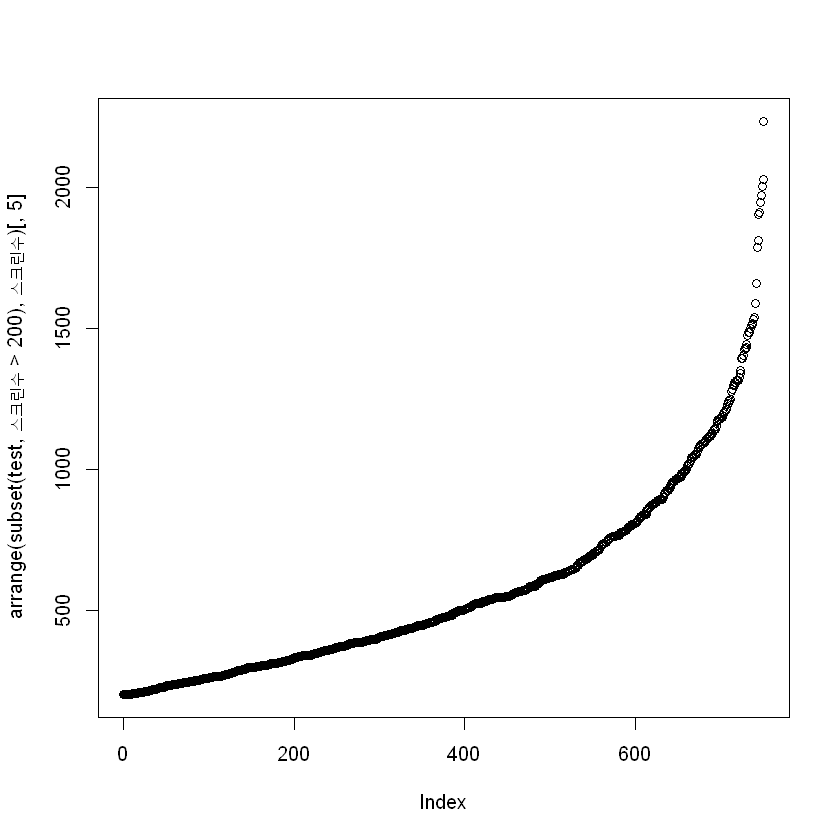

In [41]:
plot(arrange(subset(test, 스크린수 > 200), 스크린수)[,5])

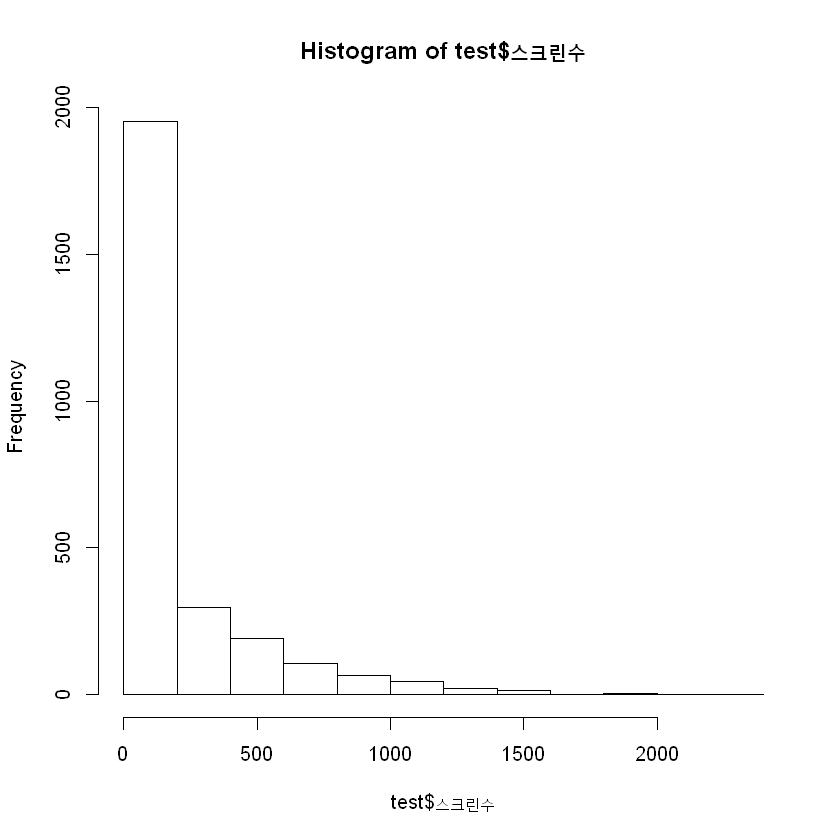

In [37]:
hist(test$스크린수)

In [26]:
test2 <- test
test2$누적관객수 <- sqrt(test$누적관객수)
test2$누적관객수 <- sqrt(test2$누적관객수)
test2$누적관객수 <- sqrt(test2$누적관객수)

In [27]:
nrow(subset(test2, 누적관객수 > 3))

[1] 1002

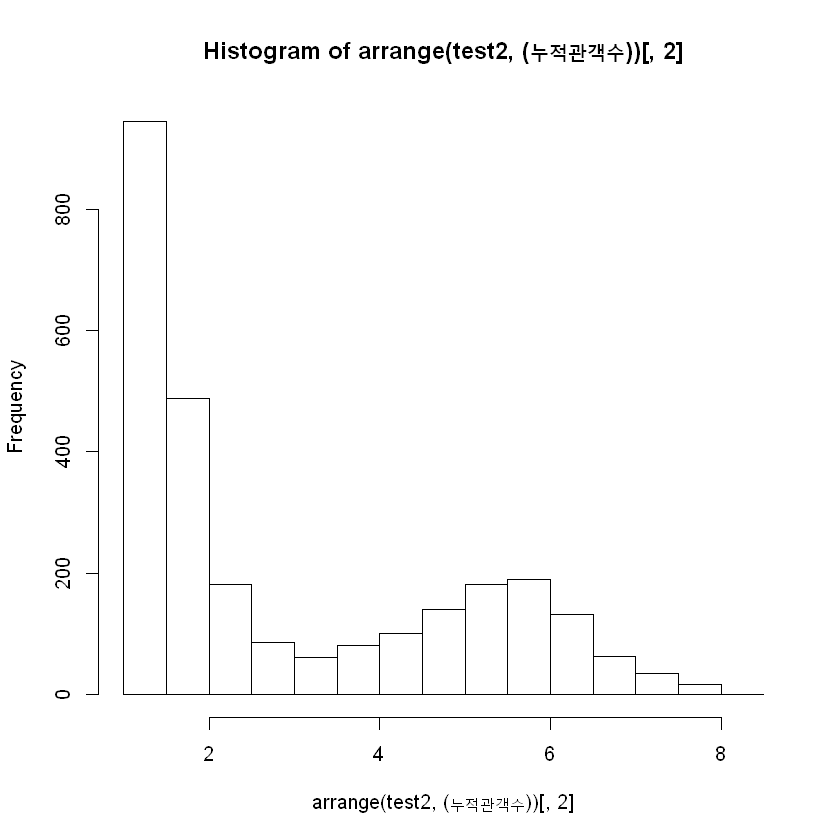

In [28]:
hist(arrange(test2, (누적관객수))[,2])
options(scipen=100)

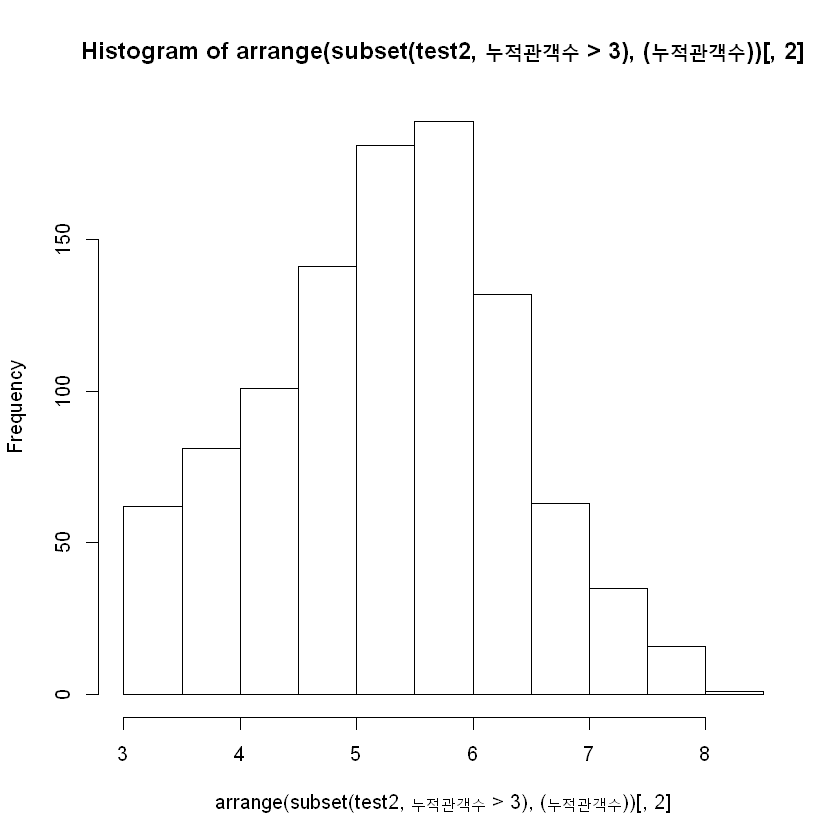

In [29]:
hist(arrange(subset(test2, 누적관객수 > 3), (누적관객수))[,2])
options(scipen=100)

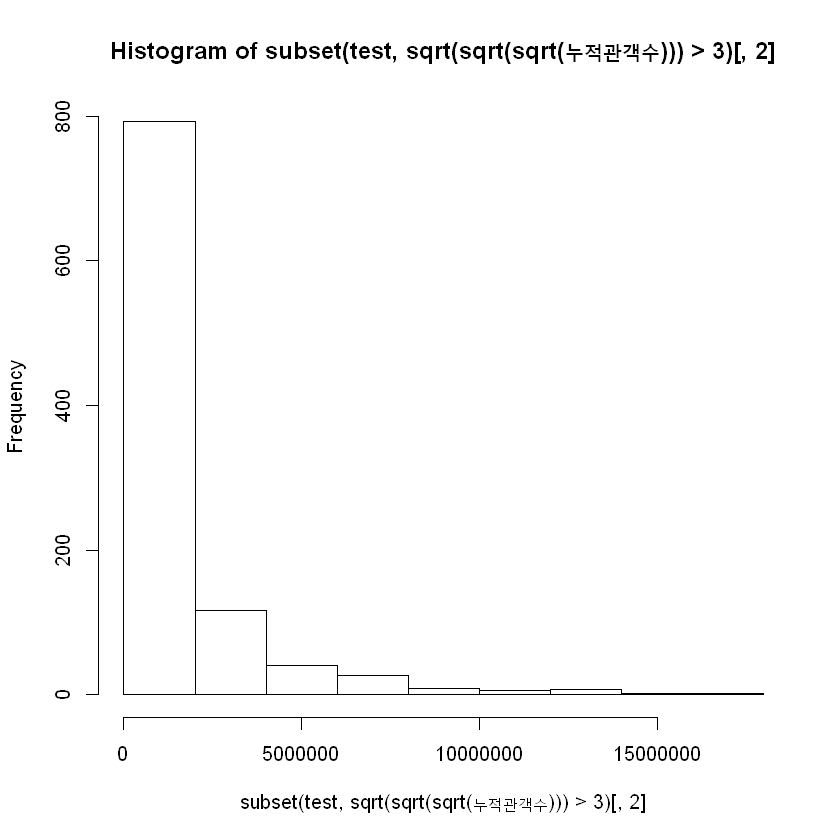

In [33]:
hist(subset(test, sqrt(sqrt(sqrt(누적관객수))) > 3)[,2])

In [31]:
subset(test, sqrt(sqrt(sqrt(누적관객수))) > 2)

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
1,내사랑 싸가지,296125,0.3,1836153500,22,1836153500,296125,2967,2004-01-16,제이웰엔터테인먼트(주),(주)시네마서비스,12세관람가,코미디,신동엽,김재원
2,말죽거리 잔혹사,604969,0.6,3837152000,40,3837152000,604969,5513,2004-01-16,(주)싸이더스,CJ ENM,15세관람가,액션,유하,권상우
3,빙우,55656,0.1,363240500,18,363240500,55656,1015,2004-01-16,쿠앤필름(주),(주)쇼박스,12세관람가,드라마,김은숙,김하늘
4,그녀를 모르면 간첩,30435,0.0,187798000,22,187798000,30435,822,2004-01-30,(주)엠쓰리엔터테인먼트,(주)쇼박스,15세관람가,코미디,박한준,공유
5,안녕! 유에프오,40361,0.0,250534000,17,250534000,40361,864,2004-01-30,우리영화(주),(주)튜브엔터테인먼트,전체관람가,드라마,김진민,김응수
6,태극기 휘날리며,2544986,2.3,15687429500,115,15687429500,2544986,22376,2004-02-05,강제규필름,(주)다자인소프트,15세관람가,전쟁,강제규,장동건
7,마법경찰 갈갈이와 옥동자,3074,0.0,18446500,13,18446500,3074,252,2004-02-13,(주)토토엔터테인먼트,콜럼비아트라이스타㈜,전체관람가,코미디,이한열,박준형
8,그녀를 믿지 마세요,298221,0.3,1859615500,25,1859615500,298221,4664,2004-02-20,㈜영화사시선,(주)시네마서비스,12세관람가,코미디,배형준,강동원
9,목포는 항구다,425725,0.4,2673832500,25,2673832500,425725,6239,2004-02-20,기획시대(주),코리아픽쳐스(주),15세관람가,드라마,김지훈,김윤태
10,어깨동무,119884,0.1,753985500,26,753985500,119884,3015,2004-03-12,(주)씨케이픽쳐스,CJ ENM,15세관람가,코미디,조진규,김아중


In [88]:
res <- read.csv("./real_result.csv")

In [89]:
res

개봉일,영화명,스크린수
20140730,명량,1159
20190123,극한직업,1553
20171220,신과함께-죄와벌,1538
20141217,국제시장,931
20150805,베테랑,957
20120725,도둑들,890
20130123,7번방의선물,605
20150722,암살,1264
20120913,"광해,왕이된남자",688
20180801,신과함께-인과연,1967


In [90]:
ntest <- arrange(test, desc(누적관객수))

In [91]:
ntest

영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
명량,17615658,8.300,135757221810,1587,135756636810,17615545,188702,2014-07-30,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,사극,김한민,최민식
극한직업,16265618,0.075,139651845516,2003,139651845516,16265618,292584,2019-01-23,(주)어바웃잇,(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,류승룡
신과함께-죄와 벌,14411775,3.800,115707627637,1912,115707627637,14411775,213315,2017-12-20,리얼라이즈픽쳐스(주),롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,판타지,김용화,하정우
국제시장,14263578,6.800,110942451730,1044,110937978730,14262661,212676,2014-12-17,(주)제이케이필름,(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,황정민
베테랑,13414484,6.400,105170856250,1115,105170856250,13414484,199307,2015-08-05,(주)외유내강,(주)씨제이이엔엠,15세이상관람가,액션,류승완,황정민
도둑들,12984692,5.400,93672361700,1091,93670679700,12984181,155469,2012-07-25,(주)케이퍼필름,(주)쇼박스,15세이상관람가,액션,최동훈,김윤석
7번방의 선물,12811714,5.300,91434811670,866,91433479670,12811492,166853,2013-01-23,(주)화인웍스,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,코미디,이환경,류승룡
암살,12706819,6.000,98468435781,1519,98468435781,12706819,175213,2015-07-22,(주)케이퍼필름,(주)쇼박스,15세이상관람가,액션,최동훈,전지현
"광해, 왕이 된 남자",12324062,5.100,88913283469,1001,88911623469,12323758,203445,2012-09-13,리얼라이즈픽쳐스(주),(주)씨제이이엔엠,15세이상관람가,사극,추창민,이병헌
신과함께-인과 연,12276350,0.055,102677675409,2235,102677675409,12276350,180042,2018-08-01,리얼라이즈픽쳐스(주),롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,판타지,김용화,하정우


In [92]:
library(stringr)

In [93]:
for (i in 1:nrow(res)) {
    if(res$영화명[i] != str_replace_all(ntest$영화명[i], " ","")) {
        print(i)
    }
} 

[1] 1003
[1] 1004
[1] 1005
[1] 1006
[1] 1007
[1] 1008
[1] 1009
[1] 1010
[1] 1011
[1] 1012
[1] 1013
[1] 1014
[1] 1015
[1] 1016
[1] 1017
[1] 1018
[1] 1019
[1] 1020
[1] 1021
[1] 1022
[1] 1023
[1] 1024
[1] 1025
[1] 1026
[1] 1027
[1] 1028
[1] 1029
[1] 1030
[1] 1031
[1] 1032
[1] 1033
[1] 1034
[1] 1035
[1] 1036
[1] 1037
[1] 1038
[1] 1039
[1] 1040
[1] 1041
[1] 1042
[1] 1043
[1] 1044
[1] 1045
[1] 1046
[1] 1047
[1] 1048
[1] 1049
[1] 1050
[1] 1051
[1] 1052
[1] 1053
[1] 1054
[1] 1055
[1] 1056
[1] 1057
[1] 1058
[1] 1059
[1] 1060
[1] 1061
[1] 1062
[1] 1063
[1] 1064
[1] 1065
[1] 1066
[1] 1067
[1] 1068
[1] 1069
[1] 1070
[1] 1071
[1] 1072
[1] 1073
[1] 1074
[1] 1075
[1] 1076
[1] 1077
[1] 1078
[1] 1079
[1] 1080
[1] 1081
[1] 1082
[1] 1083
[1] 1084
[1] 1085
[1] 1086
[1] 1087
[1] 1088
[1] 1089
[1] 1090
[1] 1091
[1] 1092
[1] 1093
[1] 1094
[1] 1095
[1] 1096
[1] 1097
[1] 1098
[1] 1099
[1] 1100
[1] 1101
[1] 1102
[1] 1103
[1] 1104
[1] 1105
[1] 1106
[1] 1107
[1] 1108
[1] 1109
[1] 1110
[1] 1111
[1] 1112
[1] 1113
[

In [94]:
res$영화명[1003]
res$영화명[1002]

[1] 맛있는택배
1604 Levels: 0.0MHz 10억 1724기방난동사건 1789,바스티유의연인들 ... 힘을내요,미스터리

[1] 다섯개의시선
1604 Levels: 0.0MHz 10억 1724기방난동사건 1789,바스티유의연인들 ... 힘을내요,미스터리

In [95]:
ntest$영화명[1004]
ntest$영화명[1003]
ntest$영화명[1002]

[1] 맛있는 택배
2703 Levels: 0.0MHz 10억 1724 기방난동사건 ... 힙스터: 안개의 덫

[1] 날으는 돼지 - 해적 마테오
2703 Levels: 0.0MHz 10억 1724 기방난동사건 ... 힙스터: 안개의 덫

[1] 다섯 개의 시선
2703 Levels: 0.0MHz 10억 1724 기방난동사건 ... 힙스터: 안개의 덫

In [96]:
nrow(test)

[1] 2703

In [100]:
test2 <- subset(test, 누적관객수 > 10000 & 누적관객수 < 10000000)

In [101]:
test2

,영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
1,내사랑 싸가지,296125,0.3,1836153500,22,1836153500,296125,2967,2004-01-16,제이웰엔터테인먼트(주),(주)시네마서비스,12세관람가,코미디,신동엽,김재원
2,말죽거리 잔혹사,604969,0.6,3837152000,40,3837152000,604969,5513,2004-01-16,(주)싸이더스,CJ ENM,15세관람가,액션,유하,권상우
3,빙우,55656,0.1,363240500,18,363240500,55656,1015,2004-01-16,쿠앤필름(주),(주)쇼박스,12세관람가,드라마,김은숙,김하늘
4,그녀를 모르면 간첩,30435,0.0,187798000,22,187798000,30435,822,2004-01-30,(주)엠쓰리엔터테인먼트,(주)쇼박스,15세관람가,코미디,박한준,공유
5,안녕! 유에프오,40361,0.0,250534000,17,250534000,40361,864,2004-01-30,우리영화(주),(주)튜브엔터테인먼트,전체관람가,드라마,김진민,김응수
6,태극기 휘날리며,2544986,2.3,15687429500,115,15687429500,2544986,22376,2004-02-05,강제규필름,(주)다자인소프트,15세관람가,전쟁,강제규,장동건
8,그녀를 믿지 마세요,298221,0.3,1859615500,25,1859615500,298221,4664,2004-02-20,㈜영화사시선,(주)시네마서비스,12세관람가,코미디,배형준,강동원
9,목포는 항구다,425725,0.4,2673832500,25,2673832500,425725,6239,2004-02-20,기획시대(주),코리아픽쳐스(주),15세관람가,드라마,김지훈,김윤태
10,어깨동무,119884,0.1,753985500,26,753985500,119884,3015,2004-03-12,(주)씨케이픽쳐스,CJ ENM,15세관람가,코미디,조진규,김아중
11,어디선가 누군가에 무슨일이 생기면 틀림없이 나타난다 홍반장,181510,0.2,1158210500,28,1158210500,181510,3570,2004-03-12,㈜제니스엔터테인먼트,(주)시네마서비스,12세관람가,코미디,강석범,김주혁


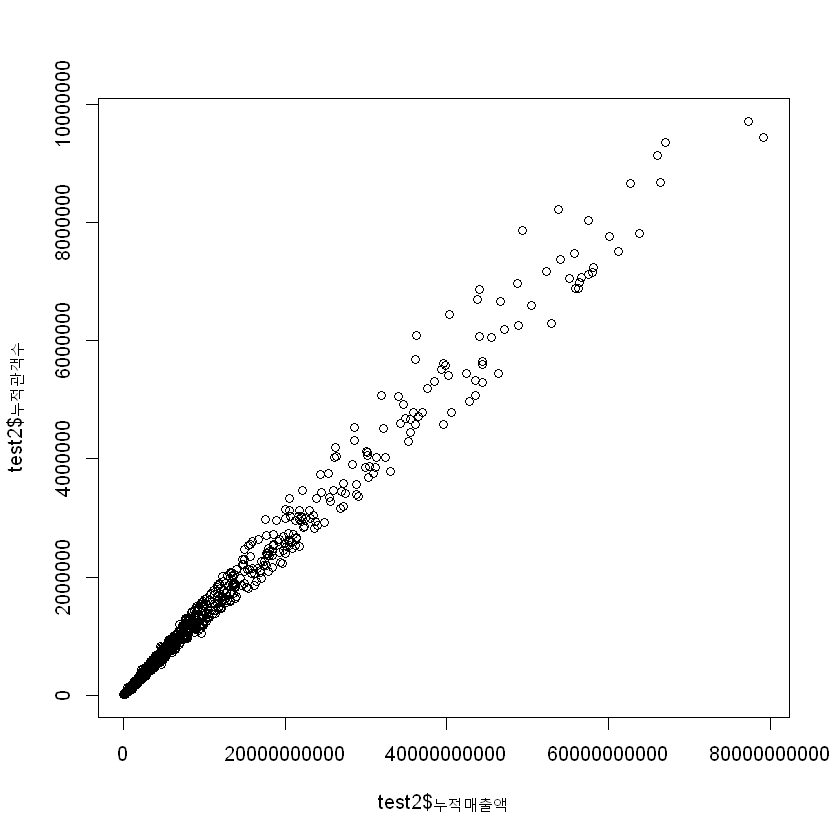

In [105]:
plot(test2$누적매출액, test2$누적관객수)

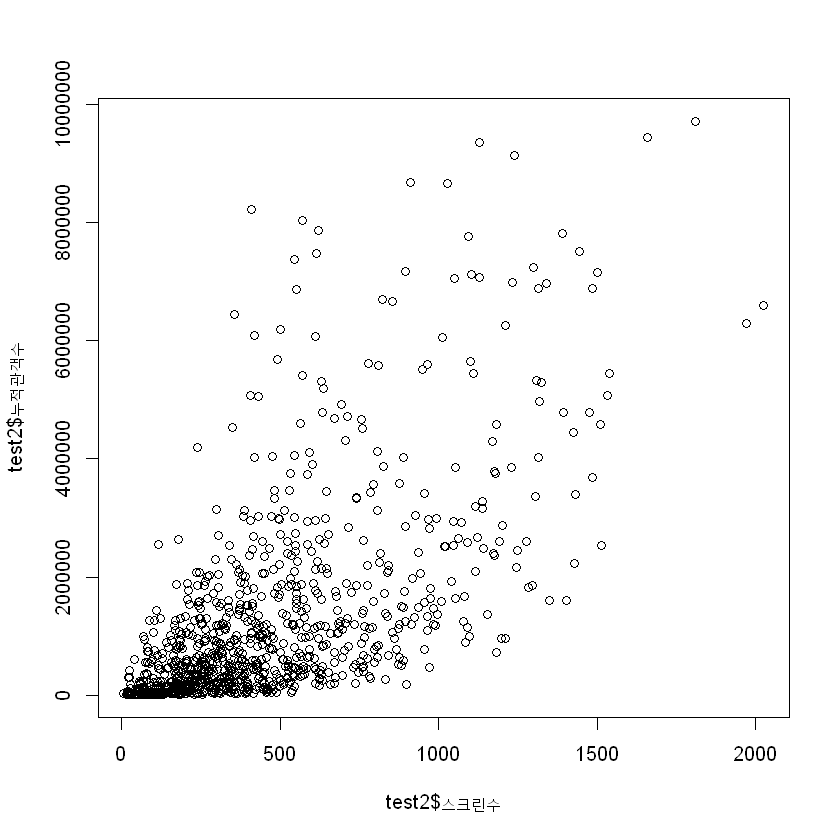

In [104]:
plot(test2$스크린수, test2$누적관객수)

In [106]:
cor(test2$스크린수, test2$누적관객수)

[1] 0.6359144

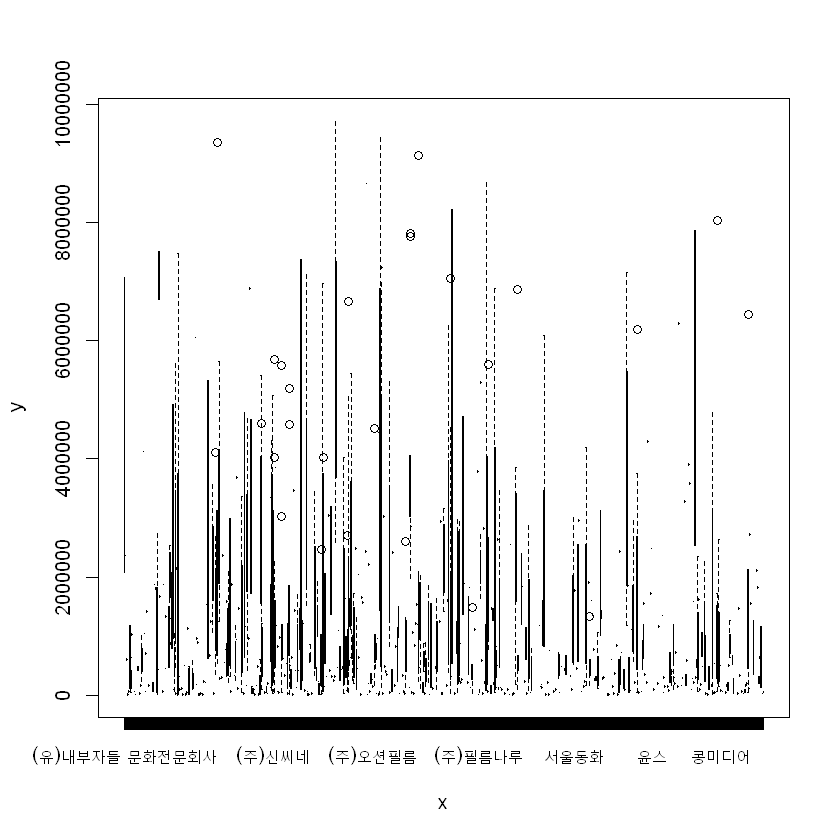

In [107]:
plot(test2$제작사, test2$누적관객수)

In [113]:
subset(test, test$영화명 == "...ing")

영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우


In [115]:
arrange(test, 영화명)

영화명,누적관객수,매출액점유율,누적매출액,스크린수,매출액,관객수,상영횟수,개봉일,제작사,배급사,등급,장르,감독,배우
0.0MHz,137294,0.001,1088258860,446,1088258860,137294,5998,2019-05-29,(주)제이엠컬쳐스,(주)스마일이엔티,15세이상관람가,공포(호러),유선동,정은지
10억,433866,0.400,3107403000,252,3107403000,433866,12744,2009-08-06,(주)이든픽쳐스,(주)싸이더스,15세이상관람가,스릴러,조민호,박해일
1724 기방난동사건,288452,0.200,1897970000,340,1897970000,288452,19036,2008-12-03,(주)싸이더스,(주)싸이더스,15세이상관람가,사극,여균동,이정재
"1789, 바스티유의 연인들",4078,0.000,69354500,35,69354500,4078,436,2014-09-18,(주)패뷸러스,유니버설픽쳐스인터내셔널 코리아(유),전체관람가,뮤지컬,정성복,루이
19-Nineteen,32616,0.000,209955500,64,209955500,32616,1875,2009-11-12,(주)삼화네트웍스,CJ ENM,12세이상관람가,드라마,장용우,T.O
19 섹스 맛있는 속 궁합,177,0.000,930000,20,930000,177,20,2016-09-02,(주)케이알씨지,(주)케이알씨지,청소년관람불가,멜로/로맨스,이민우,
1987,7232387,0.800,58169776145,1299,58169776145,7232387,138226,2017-12-27,(주)우정필름,(주)씨제이이엔엠,15세이상관람가,드라마,장준환,안대겸
19금 만남의 목적,177,0.000,930000,20,930000,177,20,2016-09-02,(주)케이알씨지,(주)케이알씨지,청소년관람불가,멜로/로맨스,이세일,
19금 섹스비디오,1,0.000,5000,1,5000,1,1,2017-02-21,(주)케이알씨지,(주)케이알씨지,청소년관람불가,멜로/로맨스,박범수,
19금 섹스비디오 무삭제 감독판,1,0.000,3000,1,3000,1,1,2017-04-17,(주)케이알씨지,(주)케이알씨지,청소년관람불가,멜로/로맨스,박범수,
